In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
data["type"].value_counts()

vbar_categorical    200
hbar_categorical    200
line                200
pie                 200
dot_line            200
Name: type, dtype: int64

## TASK 1

In [ ]:
train_val_path = "/content/drive/MyDrive/charts/train_val"
train_val_csv = "/content/drive/MyDrive/charts/train_val.csv"

label_mapping = {
    "line": 0,
    "dot_line": 1,
    "hbar_categorical": 2,
    "vbar_categorical": 3,
    "pie": 4
}


data = pd.read_csv(train_val_csv)

X = []
y = []

for index, row in data.iterrows():
    img_path = os.path.join(train_val_path, str(row['image_index'])+".png")
    img = Image.open(img_path).convert('RGB')
    img_array = np.array(img) / 255.0
    X.append(img_array)
    y.append(label_mapping[row['type']])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=5)


## TASK 2

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1:])))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 6s 33ms/step - loss: 2.2159 - accuracy: 0.4212 - val_loss: 0.8008 - val_accuracy: 0.7100
Epoch 2/20
25/25 [==============================] - 0s 18ms/step - loss: 0.6511 - accuracy: 0.7000 - val_loss: 0.4339 - val_accuracy: 0.7750
Epoch 3/20
25/25 [==============================] - 0s 18ms/step - loss: 0.5159 - accuracy: 0.7650 - val_loss: 0.3486 - val_accuracy: 0.8200
Epoch 4/20
25/25 [==============================] - 0s 17ms/step - loss: 0.4153 - accuracy: 0.7975 - val_loss: 0.2880 - val_accuracy: 0.9000
Epoch 5/20
25/25 [==============================] - 0s 17ms/step - loss: 0.3251 - accuracy: 0.8338 - val_loss: 0.2445 - val_accuracy: 0.9150
Epoch 6/20
25/25 [==============================] - 0s 19ms/step - loss: 0.2807 - accuracy: 0.8900 - val_loss: 0.2046 - val_accuracy: 0.9350
Epoch 7/20
25/25 [==============================] - 0s 18ms/step - loss: 0.2807 - accuracy: 0.8737 - val_loss: 0.1844 - val_accuracy: 0.9350
Epoch 8/20
25

In [ ]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

7/7 [==============================] - 0s 11ms/step - loss: 0.0160 - accuracy: 0.9950
Validation Loss: 0.016045700758695602
Validation Accuracy: 0.9950000047683716


Here are the observations:

The training loss decreases consistently over the 20 epochs, showing that the model is learning from the training data and improving its performance over time.

The validation loss also decreases over the 20 epochs, but there are some small fluctuations. Overall, the validation loss is very low, and the model performs well on the validation dataset.

The validation accuracy also increases over time, reaching an impressive 99.5% by the end of the 20 epochs. This suggests that the model generalizes well and is able to correctly classify the chart types in the validation dataset.

The model converges quite fast, with most of the improvement in performance happening within the first 10-15 epochs. This might indicate that the learning rate of the optimizer (Adam in this case) is appropriate for this problem, and the model architecture is suitable for the task.

The two-layer CNN seems to be sufficient for this classification task, as it yields high accuracy on both the training and validation datasets. However, further experimentation with different architectures, hyperparameters, and regularization techniques can be done to check if there's still room for improvement.

Overall, the two-layer CNN model has performed well on this classification task, achieving high accuracy on both training and validation datasets. The model seems to generalize well, and the training and validation losses are consistently decreasing throughout the training process.

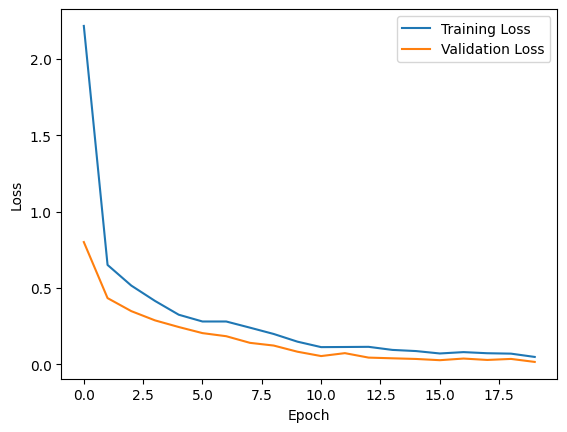

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## TASK 3

In [ ]:
!pip install tf-models-official


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from official.vision.image_classification import alexnet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

input_shape = (224, 224, 3)

# Load the base AlexNet model
base_alexnet = alexnet.model(num_classes=1000, input_shape=input_shape)

# Modify the base AlexNet model for our specific problem
x = base_alexnet.layers[-2].output
x = GlobalAveragePooling2D()(x)
output_layer = Dense(5, activation='softmax')(x)

pretrained_alexnet = Model(inputs=base_alexnet.input, outputs=output_layer)


In [ ]:
!pip install torch torchvision

In [ ]:
import torch
import torchvision.models as models

# Load the pretrained AlexNet model
pretrained_alexnet = models.alexnet(pretrained=True)

# Modify the last layer to have 5 output classes instead of 1000 (ImageNet classes)
num_classes = 5
pretrained_alexnet.classifier[6] = torch.nn.Linear(in_features=4096, out_features=num_classes, bias=True)

print(pretrained_alexnet)


In [ ]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision.transforms import Resize, ToTensor, Normalize

class ChartDataset(Dataset):
    def __init__(self, data_dir, labels_csv, transform=None):
        self.data_dir = data_dir
        self.labels = pd.read_csv(labels_csv)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        print(os.path.join(self.data_dir, str(self.labels.iloc[idx, 0])+".png"))
        img_name = os.path.join(self.data_dir, str(self.labels.iloc[idx, 0])+".png")
        image = Image.open(img_name).convert("RGB")
        label = torch.tensor(label_mapping[self.labels.iloc[idx, 1]], dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torchvision

# Define the data transformations
data_transforms = torchvision.transforms.Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the dataset instances
data_dir = "/content/drive/MyDrive/charts/train_val"
labels_csv = "/content/drive/MyDrive/charts/train_val.csv"
dataset = ChartDataset(data_dir, labels_csv, transform=data_transforms)

# Split the data into training and validation sets
train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Create the DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, num_workers=2)


In [ ]:
import torch.optim as optim
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
pretrained_alexnet.to(device)

# Set the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(pretrained_alexnet.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = pretrained_alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print the average loss for this epoch
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

print("Finished training")


Epoch 1, Loss: 0.2996642329805763
Epoch 2, Loss: 0.024821746881425497
Epoch 3, Loss: 0.00285320860628417
Epoch 4, Loss: 0.0006085026282744366
Epoch 5, Loss: 0.0006321120685151982
Epoch 6, Loss: 0.0004512445058753656
Epoch 7, Loss: 8.461053449849487e-05
Epoch 8, Loss: 6.012466148149542e-05
Epoch 9, Loss: 9.408634364945101e-05
Epoch 10, Loss: 4.4545304099301575e-05
Epoch 11, Loss: 3.808840588590101e-05
Epoch 12, Loss: 5.248352489161334e-05
Epoch 13, Loss: 2.7994633931029967e-05
Epoch 14, Loss: 3.4670314948925804e-05
Epoch 15, Loss: 3.8269421461336604e-05
Epoch 16, Loss: 2.4022578791118577e-05
Epoch 17, Loss: 2.736884510341042e-05
Epoch 18, Loss: 4.109363920179021e-05
Epoch 19, Loss: 0.0001629970156204763
Epoch 20, Loss: 4.625793140121459e-05
Finished training


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = pretrained_alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the validation set: {100 * correct / total}%")

Accuracy on the validation set: 100.0%
